# Quantum Ensemble as Simple Averaging (Section 4.3)

### Fixed $U_{(i,j)}$ for independent  quantum trajectories

This notebook describes the quantum circuit to obtain $4$ independent quantum trajectories in superposition considering a Quantum Ensemble of cosine classifiers (Section 4.1).

In [1]:
# Import pakages and functions
import sys
from Utils import *
from modeling import *

### (Step 1) State Preparation

For a 2-qubits $control$ register $(d=2)$, we can build an ensemble of $B=2^2$ classifiers. The $data$ register leverages the *qubit encoding strategy* where a single observation is encoded in a single qubit. In particular, given a dataset made up of $N$ observations $(x_i, y_i)_{i=1, \dots, N}$, where $x_i =(x_{i,1}, x_{i,2})$ is a $2$-dimensional vector and $y_i \in \{0,1\}$ is the binary target variable, the quantum register that encodes the whole dataset comprises two sets of qubits:
$$
\begin{align}
    \text{data register: } \underset{features}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| x_i \right\rangle \big)}\otimes  \underset{ labels}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| y_i \right\rangle \big)}
\end{align}
$$
where the values $x_{i,1}$ and $x_{i,2}$ are stored into the amplitudes of a single qubit: 
$$
\begin{align}
    \left| x_i \right\rangle = x_{i,1}\left| 0 \right\rangle +  x_{i,2}\left| 1 \right\rangle
\end{align}
$$
and the two class of the target variable are represented by the two basis state of a single qubit, so if $\left| y_i \right\rangle=\left| 0 \right\rangle$ the $i$-th observation belongs to the class $0$. Otherwise if $\left| y_i \right\rangle=\left| 1 \right\rangle$ the $i$-th observation belongs to the class $1$. 

*Qubit encoding strategy* allows to store a training set of $4$ observations using a $8$-qubits $data$ register. Furthermore, in order to obtain different observation in superposition, entangled with the $control$ register it is possible to apply swap operations to move observation from one register to the other. In formulas, state preparation step leads to:

$$
\begin{align*}
    \left|\Phi_1\right\rangle = &  \big( H^{\otimes 2} \otimes S_{(x,y)} \big)\left|0\right\rangle \otimes \left|0\right\rangle \otimes \left|0\right\rangle \nonumber \\ 
        = &
   \left|c_1\right\rangle \otimes \left|c_2\right\rangle \otimes \left|x\right\rangle \left|y\right\rangle \nonumber\\
    = & 
    \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle \end{align*}
$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$ and $H$ is the Hadamard transformation.

### (Step 2) Sampling in Superposition

The second step regards the generation of $2^d$ different transformations of the training set in superposition, each entangled with a state of the control register. To this end, $d$ steps are necessary, where each step consists in the entanglement of the $i$-th control qubit with two transformations of $\left|x,y\right\rangle$ based on two random unitaries, $U(i,1)$ and $U(i,2)$, for $i = 1,2$.

As shown in the **Appendix A**, *Sampling in Superposition* step leads to the following quantum state:
$$
\begin{align}
\left|\Phi_{3}\right\rangle
=  \frac{1}{2}\Big[
 \hspace{.2em} &\left|00\right\rangle U_{(2,1)}U_{(1,1)}\left|x_0,x_1,x_2,x_3 \right\rangle \left| y_0,y_1,y_2,y_3\right\rangle    
\nonumber \\ + & 
\left|01\right\rangle U_{(2,1)}U_{(1,2)}\left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle
\nonumber \\ + & 
\left|10\right\rangle U_{(2,2)}U_{(1,1)}\left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle
\nonumber \\ + & 
\left|11\right\rangle U_{(2,2)}U_{(1,2)}\left|x_0,x_1,x_2,x_3\right\rangle \left| y_0,y_1,y_2,y_3\right\rangle 
         \Big]  
     %\nonumber \\
 %& \hspace{-2.75em} = \frac{1}{\sqrt{4}} \sum_{b=1}^{4} \ket{b} V_b\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}
\end{align}
$$

In order to obtain independend quantum trajectories we provide the following definition for $U_{(i,j)}$:
$$U_{(1,1)} = \text{swap}(x_0,x_2) \times \text{swap}(y_0,y_2)$$
$$U_{(1,2)} = \text{swap}(x_1,x_3) \times \text{swap}(y_1,y_3)$$
$$U_{(2,1)} = \mathbf{I} $$
$$U_{(2,2)} = \text{swap}(x_2,x_3) \times \text{swap}(y_2,y_3)$$

where $ \mathbf{I}$ is the identity matrix. Thus, the step of *Sampling in Superposition* leads to:

\begin{align*}
    \left|\Phi_{3}\right\rangle = \frac{1}{2}\Big[ 
    & \left|11\right\rangle \left|x_0, x_3, x_1, x_2\right\rangle  \left|y_0, y_3, y_1, y_2\right\rangle  
    \\ + &
    \left|11\right\rangle \left|x_2, x_1, x_3, x_0\right\rangle  \left|y_2, y_1, y_3, y_0\right\rangle+ \nonumber\\ 
    \hspace{.1em} 
    + &
    \left|01\right\rangle \left|x_0, x_3, x_2, x_1\right\rangle \left|y_0, y_3, y_2, y_1\right\rangle \\
    + &
    \left|00\right\rangle \left|x_2, x_1, x_0, x_3\right\rangle \left|y_2, y_1, y_0, y_3\right\rangle
    \Big]
\end{align*}

We can see that swap operations allows to entangle a different dataset (in terms of the indices of the qubits) to different state of the $control$ register. In particular, if considering the last qubit of the *features* and *labels* registers, this choice for $U_{(i,j)}$ guarantees that each quantum state of the control register is entangled with a different training observation. Using a compact representation:

\begin{align}
     \left|\Phi_{3^{'}}\right\rangle = & \frac{1}{2}\Big[ 
    \left|11\right\rangle \left|x_2\right\rangle  \left|y_2\right\rangle  
    + 
    \left|10\right\rangle\left|x_0\right\rangle\left|y_0\right\rangle 
    +
    \left|01\right\rangle\left|x_1\right\rangle\left|y_1\right\rangle 
    +
    \left|00\right\rangle\left|x_3\right\rangle \left|y_3\right\rangle 
    \Big] =
    \frac{1}{2}\sum_{i=0}^{3}\left|i\right\rangle\left|x_i,y_i\right\rangle
\end{align}

Notice that, in this case the $i$-th basis state does not correspond to the integer representation of the binary state. 

### (Step 3) Learning via interference

First, the $test$ register is initialised to encode the test set, $\tilde{x}$, considering also an additional register to store the final prediction:


\begin{align}
    (S_{\tilde{x}} \otimes \mathbb{1}) \left|0\right\rangle \left|0\right\rangle =\left|\tilde{x}\right\rangle \left|0\right\rangle
\end{align}

Then, the $data$ and $test$ registers interact via interference using the quantum version of the cosine classifier (gate $F$) to compute the estimates of the target variable:

\begin{align}
    \left|\Phi_{f}\right\rangle 
                & = \Big(\mathbb{1}^{\otimes 2} \otimes F \Big) \left|\Phi_{d}\right\rangle \nonumber \\ = & (\mathbb{1}^{\otimes d} \otimes F )\Bigg[\frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\Bigg] \otimes \left|\tilde{x}\right\rangle \left|0\right\rangle  \nonumber \\ = & \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\left|\tilde{x}\right\rangle \left|\hat{f}_b\right\rangle
    %CV_{t}\ket{\psi} = CV_{t}\ket{x, y}\ket{0} \ket{\Tilde{x}, 0} = C \ket{x, y}\ket{x_t, x_y} \ket{\Tilde{x}, 0} = \ket{x, y}\ket{x_t, x_t} \ket{\Tilde{x}, \tilde{y}} %= \ket{x, y, D_t, \Tilde{x}, f(\Tilde{x}|x_t,y_t)} 
\end{align}

where $\hat{f_b}$ represents the $b$-th prediction for $\tilde{x}$ given the  $b$-th training set. 

### Measurement

\begin{align}
    \left\langle M \right\rangle = &  
    \frac{1}{2^d}\sum_{b=1}^{2^d} \left\langle\hat{f}_b|M|\hat{f}_b\right\rangle =
    \frac{1}{2^d}\sum_{b=1}^{2^d}\left\langle M_b \right\rangle  \nonumber \\
    = & \frac{1}{B} \sum_{b=1}^B \hat{f}_b = \hat{f}_{bag}(\tilde{x}|x,y)
    %\frac{1}{2^d}\sum_{i=0}^{2^d-1} \ket{i} \ket{f(\tilde{x}|D_i)}  
\end{align}

## Implementation

In [2]:
d = 2
n_obs = 4
control = QuantumRegister(d, 'd')
data = QuantumRegister(n_obs, 'x')
labels = QuantumRegister(n_obs, 'y')
data_test = QuantumRegister(1, 'x^{test}')
label_test = QuantumRegister(1, 'y^{test}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(control, data, labels, data_test, label_test, c)


S = Gate(name='   S   ', num_qubits=8, params=[])
qc.append(S, [data[0], data[1], data[2], data[3],
              labels[0], labels[1], labels[2], labels[3]])


# for i in range(d):
#     qc.h(control[i])

W = Gate(name='   W   ', num_qubits=2, params=[])
qc.append(W, [control[0], control[1]])


U1 = [0, 2]
U2 = [1, 3]  
U4 = [2,3]  

qc.barrier()

# U1
qc.cswap(control[0], data[int(U1[0])], data[int(U1[1])])
qc.cswap(control[0], labels[int(U1[0])], labels[int(U1[1])])

qc.x(control[0])

# U2
qc.cswap(control[0], data[int(U2[0])], data[int(U2[1])])
qc.cswap(control[0], labels[int(U2[0])], labels[int(U2[1])])

qc.barrier()

# U3

qc.x(control[1])

# U4
qc.cswap(control[1], data[int(U4[0])], data[int(U4[1])])
qc.cswap(control[1], labels[int(U4[0])], labels[int(U4[1])])

qc.barrier()
#qc.initialize(x_test, [data_test[0]])
S_test = Gate(name='$S_{(test)}$', num_qubits=2, params=[])
qc.append(S_test, [data_test, label_test])

qc.barrier()

# F
ix_cls = 3


qc.h(label_test[0])
qc.cswap(label_test[0], data[ix_cls], data_test[0])
qc.h(label_test[0])
qc.cx(labels[ix_cls], label_test[0])
qc.measure(label_test[0], c)

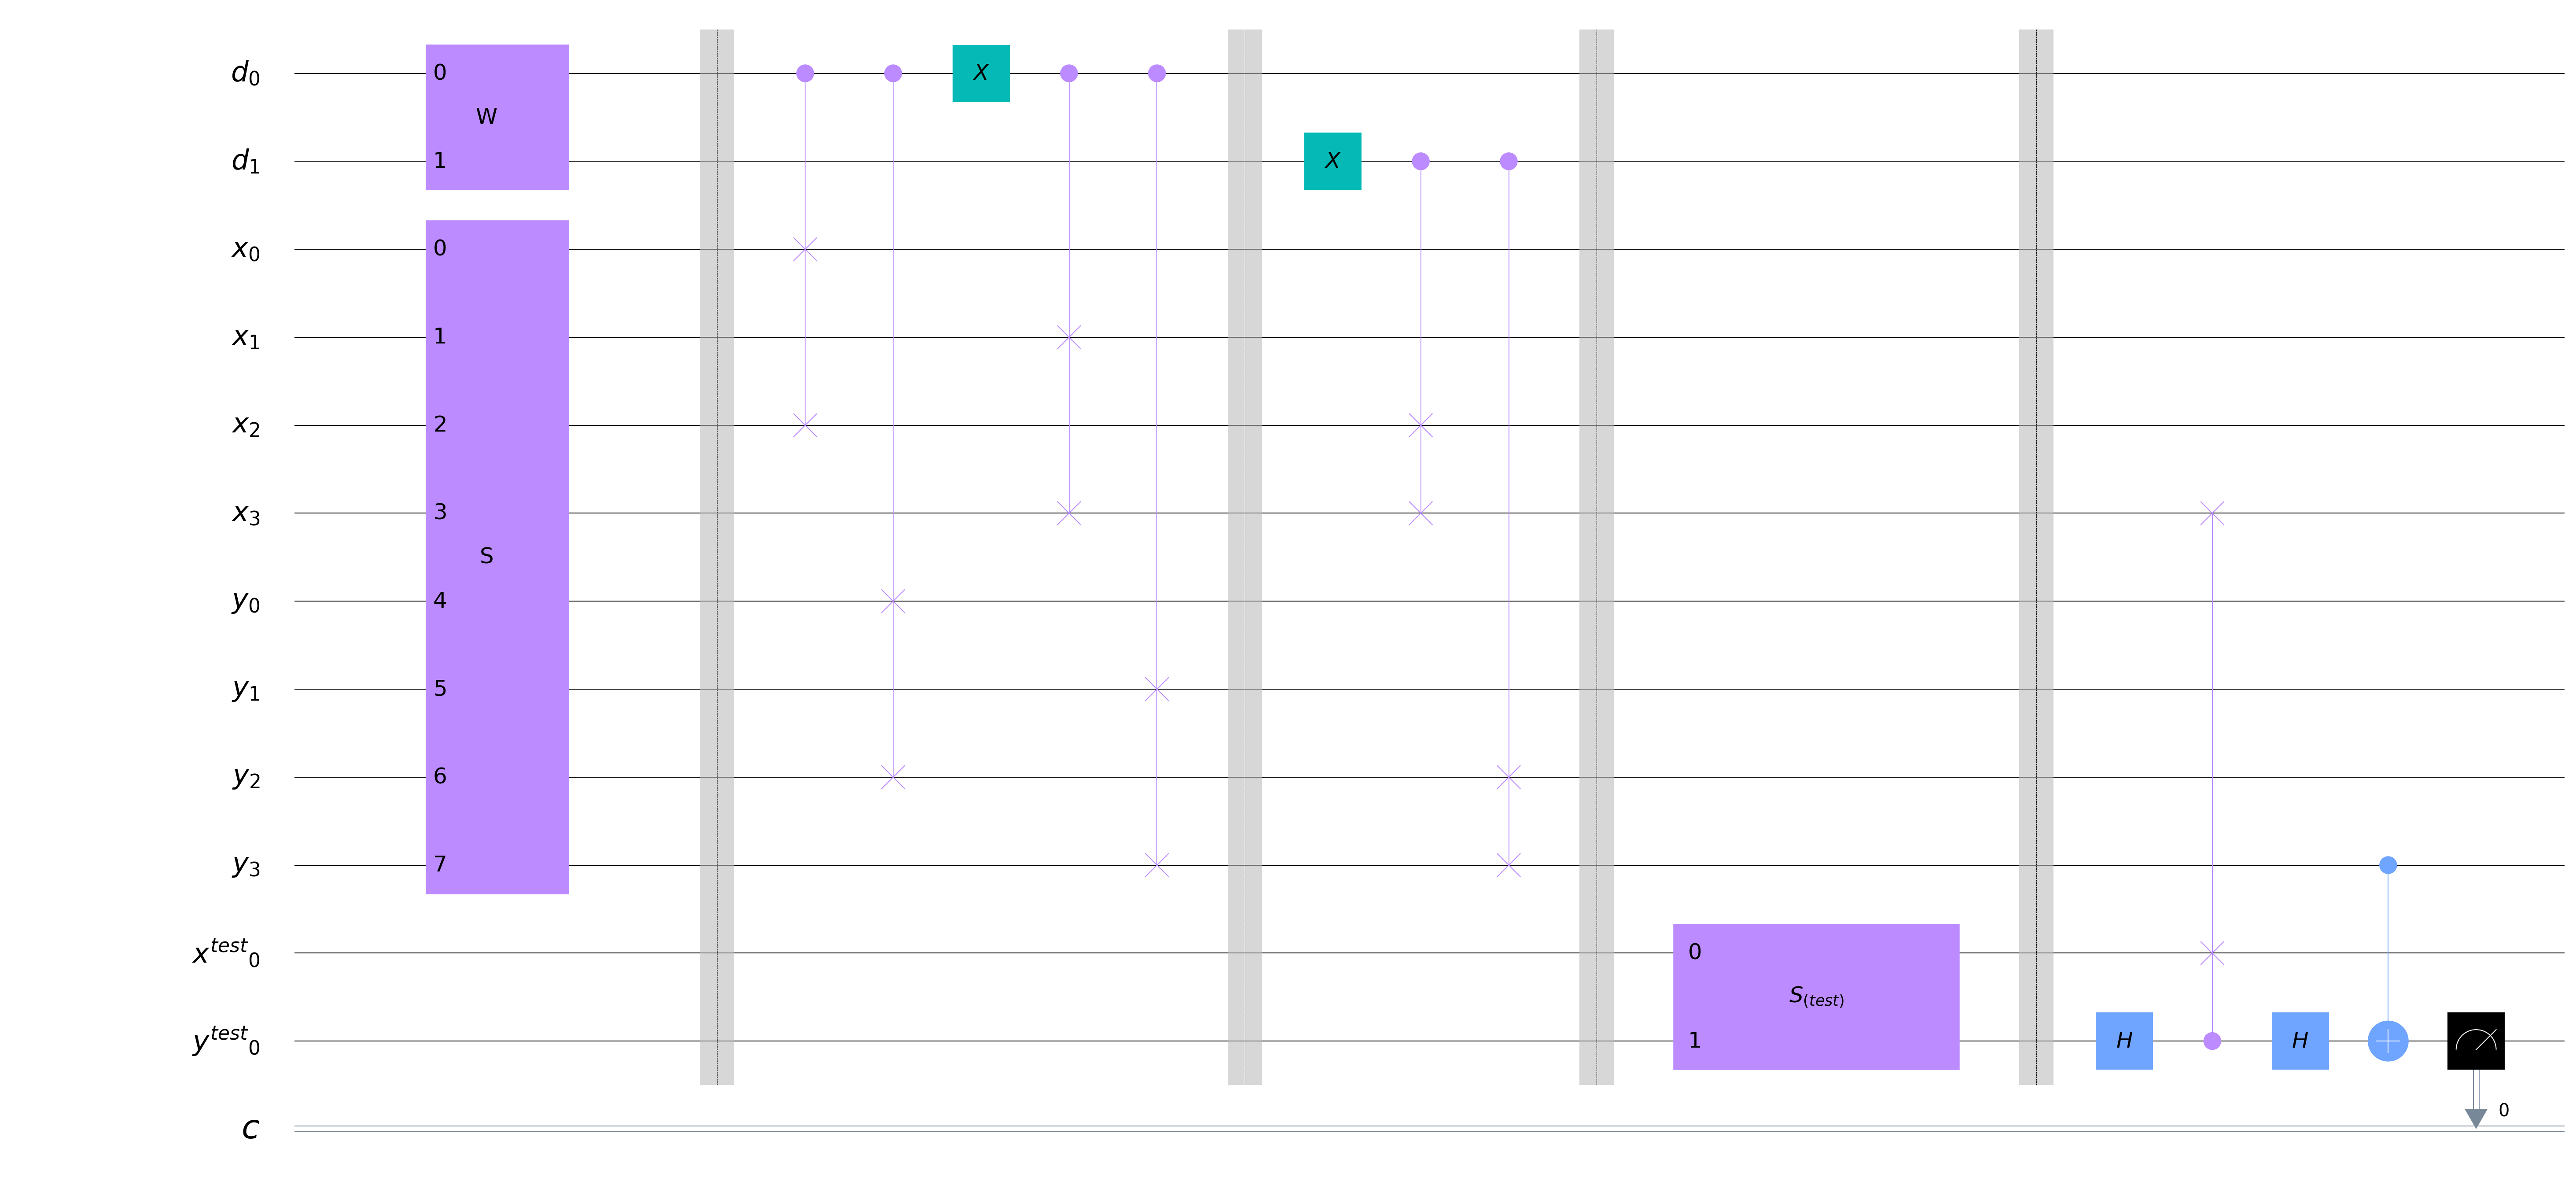

In [3]:
qc.draw(output='mpl', scale=.8, filename='output/ensemble_circuit.png', 
        style={'fontsize':50, 'dpi':300}) #, vertical_compression='high')

## Experiments

In [ ]:
seed = 543
print('seed:', seed)

n_shots = 8192
N_runs = 20
y_labels =[[0,1], [1,0]]

In [ ]:
p1_avg = []
p1_ens = []

np.random.seed(seed)
for run in np.arange(N_runs):
    # print(run)
    x1 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x2 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x3 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x4 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    
    y1 = y_labels[np.random.randint(0, 2)]
    y2 = y_labels[np.random.randint(0, 2)]
    y3 = y_labels[np.random.randint(0, 2)]
    y4 = y_labels[np.random.randint(0, 2)]
    
    Y_data = [y1, y2, y3, y4]  
    X_data = [x1, x2, x3, x4]
    
    x_test = [np.random.randint(1, 9), np.random.randint(1, 9)]

    X_data, Y_data, x_test = load_data_custom(X_data, Y_data, x_test = x_test)

    qc1 = cos_classifier(X_data[0], x_test, Y_data[0] )
    r1 = exec_simulator(qc1)
    r1 = retrieve_proba(r1)

    qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
    r2 = exec_simulator(qc2)
    r2 = retrieve_proba(r2)

    qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
    r3 = exec_simulator(qc3)
    r3 = retrieve_proba(r3)

    qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
    r4 = exec_simulator(qc4)
    r4 = retrieve_proba(r4)
     
    out = [r1, r2, r3, r4]

    p0 = [p[0] for p in out]
    p1 = [p[1] for p in out]
    
    r_avg = [np.mean(p0), np.mean(p1)]
    # print('AVG:', r_avg)

    
    qc = ensemble_fixed_U(X_data, Y_data, x_test)
    qc = transpile(qc, basis_gates = ['u1', 'u2', 'u3', 'cx'], optimization_level=3)

    r = exec_simulator(qc, n_shots=n_shots)
    r_ens = retrieve_proba(r)
    # print('Ensemble', r_ens)

    out = [r1, r2, r3, r4, r_avg, r_ens]
    
    p1_avg.append(r_avg[1])
    p1_ens.append(r_ens[1])

In [ ]:
def avg_vs_ensemble(avg, ens, ens_real=None):
    if ens_real!=None:
        plt.plot(np.arange(N_runs), p1_ens_real, marker='o', color='lightblue', label='Ensemble (RL)')
    plt.plot(np.arange(N_runs), p1_ens, marker='o', color='orange', label = 'Ensemble (QASM)')
    plt.scatter(np.arange(N_runs), p1_avg, label='Simple AVG', color='sienna', zorder=3, linewidth=.5)
    plt.title('Quantum Ensemble vs Simple Average', size=12).set_position([.5, 1.05])
    plt.xlabel('runs', size=12)
    plt.ylabel(r'$P(\tilde{y}=1)$', size =12)
    plt.xticks(np.arange(0, N_runs+1, 5), size = 12)
    plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], size = 12)
    plt.ylim(0,1)
    plt.grid(alpha=.3)
    plt.legend()
    plt.savefig('output/multi_run_fixed.png', dpi = 300)

In [ ]:
avg_vs_ensemble(p1_avg, p1_ens)